# Damped Sine Wave Prediction Problem

- المشكلة ديه فكرتها ان  كل ما يزيد عدد الحاجات اللي محتاج اتذكرها بحتاج اكتر من طبقة
- sin wave an be predicted using **Vanilla LSTM** since it have to remeber only amount of movement and it can use last few time steps to predict the next time step. 
- **Dumped Sine Wave** : This is a type of sine wave that decreases with time. 
The decrease in amplitude provides an
additional longer term movement that may require an additional level of abstraction in the
LSTM to learn

## Sine Wave

In [19]:
from math import sin
from math import pi
from math import exp
from random import random
from random import randint
from random import uniform
from numpy import array
import  matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense


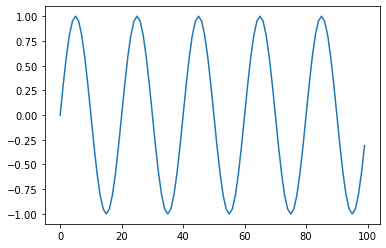

In [2]:
#create sequence 
length = 100
freq = 5
sequence=[sin(2 * pi * freq * (i/length)) for i in range(length)]
#plot sequence
plt.plot(sequence)
plt.show()

## Damped Sine Wave

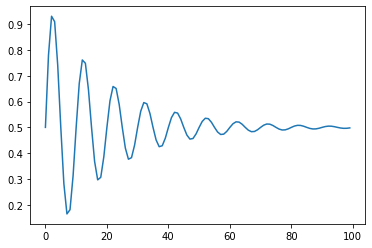

In [5]:
#create a sequence
length=100
period = 10
decay = 0.05
sequence = [0.5 + 0.5 * sin(2 * pi * i/period) * exp(-decay * i ) for i in range(length)]
plt.plot(sequence)
plt.show()

In [11]:
# generate damped sine wave in [0,1]
def generate_sequence(length, period , decay):
    return[0.5 + 0.5 * sin(2 * pi * i/period) * exp(-decay*i) for i in range(length) ]

In [14]:
#generate input and output pairs of damped sine waves
def generate_examples(length,n_patterns,output):
    X,y=list(),list()
    for _ in range(n_patterns):
        p = randint(10,20)
        d = uniform(0.0,0.1)
        sequence = generate_sequence(length+output,p,d)
        X.append(sequence[:-output])
        y.append(sequence[-output:])
    X = array(X).reshape(n_patterns, length, 1)
    y = array(y).reshape(n_patterns,output)
    return X, y

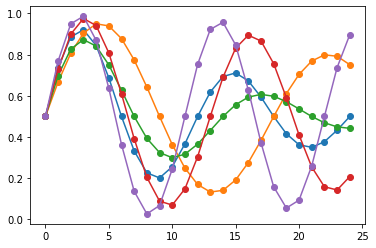

In [18]:
#test problem generation 
X, y = generate_examples(20,5,5)
for i in range(len(X)):
    plt.plot([x for x in X[i,:,0]] + [x for x in y[i]],'-o')
plt.show()

In [22]:
# configure problem
length = 5
output = 5
# define model
model = Sequential()
# return_sequnce parameter used to return sequnce for next lstm layer
model.add(LSTM(20,return_sequences=True,input_shape=(length,1)))
model.add(LSTM(20))
model.add(Dense(output))
model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 20)             1760      
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense (Dense)                (None, 5)                 105       
Total params: 5,145
Trainable params: 5,145
Non-trainable params: 0
_________________________________________________________________


In [24]:
# fit model
X, y = generate_examples(length,1000,output)
model.fit(X, y, batch_size=10, epochs=1)

100/100 [==============================] - 0s 5ms/step - loss: 0.2461


In [25]:
#evaluate model
X, y = generate_examples(length,1000,output)
loss = model.evaluate(X,y,verbose=0)
print('MAE %f'%loss)

MAE 0.161951


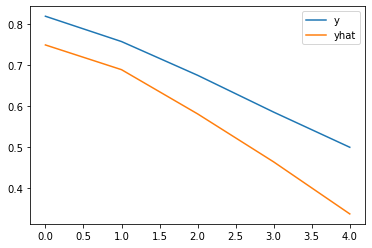

In [28]:
#make predictions with the model 
X,y = generate_examples(length,1,output)
yhat = model.predict(X,verbose=0)
plt.plot(y[0], label= 'y' )
plt.plot(yhat[0], label= 'yhat' )
plt.legend()
plt.show()
